In [51]:
from pandas import DataFrame
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import csv

url = "https://en.wikipedia.org/wiki/Household_income_in_the_United_States"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
mydivs = soup.find_all("table", {"class": "wikitable sortable jquery-tablesorter"})

household_income = soup.select("table.wikitable:nth-child(51)")[0]

column1 = []

column2 = []
for item in household_income.find_all("td"):
    if len(item.find_all('a'))==1 : 
        cols = item.find('a')
        column1.append( cols.find(text=True).strip())
        
    else :
        column2.append( int (item.find(text=True).strip().replace("$","").replace(",","")))
        
print(column1)
print(column2)
    

print(soup.select("table.wikitable:nth-child(51)"))
print(mydivs)


tableDict = {"Ethnic catagory":column1, "Mean household income":column2}


popData = DataFrame(tableDict)
popData.title = "Mean household income by ethnicity"

['Asian alone', 'White alone', 'Hispanic or Latino', 'Black']
[114105, 89632, 68319, 58985]
[<table class="wikitable sortable" style="margin: 1em auto 1em auto;">
<caption>Mean household income by ethnicity<sup class="reference" id="cite_ref-Census2014_35-1"><a href="#cite_note-Census2014-35">[35]</a></sup>
</caption>
<tbody><tr>
<th scope="col">Ethnic category
</th>
<th scope="col">Mean household income
</th></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/Asian-Americans" title="Asian-Americans">Asian alone</a></td>
<td>$114,105
</td></tr>
<tr>
<td><a href="/wiki/Non-Hispanic_whites" title="Non-Hispanic whites">White alone</a></td>
<td>$89,632
</td></tr>
<tr>
<td><a href="/wiki/Hispanic" title="Hispanic">Hispanic or Latino</a></td>
<td>$68,319
</td></tr>
<tr>
<td><a class="mw-redirect" href="/wiki/African_American" title="African American">Black</a></td>
<td>$58,985
</td></tr></tbody></table>]
[]


In [52]:
popData 

,Ethnic catagory,Mean household income
0,Asian alone,114105
1,White alone,89632
2,Hispanic or Latino,68319
3,Black,58985


<Figure size 432x288 with 0 Axes>

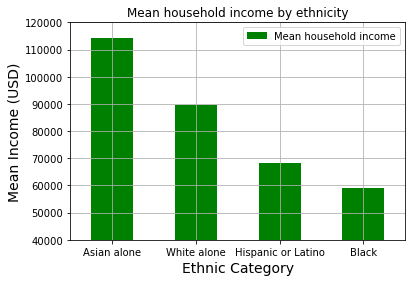

In [86]:
popData.to_csv('CSC221_webscrape_data.csv')

# Import the data from the CSV file
csvData = pd.read_csv("CSC221_webscrape_data.csv");

# Delete the first column, as it is not needed
csvData = csvData.drop([csvData.columns[0]], axis=1);

# Create the MatPlotLib Graph
plt.figure();

# Plot our data
csvData.plot(kind="bar", color="green");

# Make the graph look better
plt.title(popData.title);
plt.xticks(range(0, 4), popData["Ethnic catagory"], rotation=0);
plt.xlabel("Ethnic Category", fontsize=14);
plt.ylabel("Mean Income (USD)", fontsize=14);
plt.ylim([40000, 120000]);
plt.grid(True);
plt.show();